# Sprint 機械学習スクラッチ入門

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#このSprintについて" data-toc-modified-id="このSprintについて-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>このSprintについて</a></span><ul class="toc-item"><li><span><a href="#Sprintの目的" data-toc-modified-id="Sprintの目的-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sprintの目的</a></span></li><li><span><a href="#どのように学ぶか" data-toc-modified-id="どのように学ぶか-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>どのように学ぶか</a></span></li></ul></li><li><span><a href="#スクラッチ" data-toc-modified-id="スクラッチ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>スクラッチ</a></span><ul class="toc-item"><li><span><a href="#スクラッチの意義" data-toc-modified-id="スクラッチの意義-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>スクラッチの意義</a></span></li><li><span><a href="#【問題1】train_test_splitのスクラッチ" data-toc-modified-id="【問題1】train_test_splitのスクラッチ-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>【問題1】train_test_splitのスクラッチ</a></span></li></ul></li><li><span><a href="#scikit-learnを用いて機械学習を行うコードを作成" data-toc-modified-id="scikit-learnを用いて機械学習を行うコードを作成-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>scikit-learnを用いて機械学習を行うコードを作成</a></span><ul class="toc-item"><li><span><a href="#分類問題" data-toc-modified-id="分類問題-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>分類問題</a></span></li><li><span><a href="#【問題2】-分類問題を解くコードの作成" data-toc-modified-id="【問題2】-分類問題を解くコードの作成-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>【問題2】 分類問題を解くコードの作成</a></span></li><li><span><a href="#回帰問題" data-toc-modified-id="回帰問題-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>回帰問題</a></span></li><li><span><a href="#【問題3】-回帰問題を解くコードの作成" data-toc-modified-id="【問題3】-回帰問題を解くコードの作成-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>【問題3】 回帰問題を解くコードの作成</a></span></li><li><span><a href="#【問題1】コード改良" data-toc-modified-id="【問題1】コード改良-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>【問題1】コード改良</a></span></li></ul></li></ul></div>

## このSprintについて

### Sprintの目的
* 機械学習スクラッチの準備をする

### どのように学ぶか
今後の機械学習スクラッチ課題で作成するモデルを、scikit-learnを用いて一度動かしておきます。  
これまでの復習を兼ねたスクラッチ課題の準備です。

## スクラッチ

このSprintでは機械学習手法のスクラッチ課題に取り組む準備を行います。  
scikit-learnを用いて分類・回帰問題を解くコードを書いておき、今後のSprintではそれと同じ動作をするクラスをスクラッチで作成していきます。

### スクラッチの意義
ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。

スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。

以下のような効果を狙っています。

* 新たな手法に出会った時に理論・数式を理解しやすくする
* ライブラリを使う上での曖昧さを減らす
* 既存の実装を読みやすくする

### 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。  
以下の雛形をベースとして関数を完成させてください。  

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
  
なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [2]:
# インポート
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [434]:
def scratch_train_test_split(X,y,train_size=0.8,random_state=0):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    # 乱数のシード値
    np.random.seed(random_state)
    
    # X,yデータを横に結合
    y = y.reshape(-1,1)
    Xy = np.concatenate([X,y],axis=1)
    
    # トレインデータ、テストデータに分割
    size = len(Xy)
    pick = int(np.round(size*train_size))
    train_pick = np.random.choice(np.arange(size),pick,replace=False)
    test_pick = np.delete(np.arange(size),train_pick)
    
    train = Xy[train_pick,:]
    test = Xy[test_pick,:]

    X_train = train[:,0:(Xy.shape[1]-y.shape[1])].reshape(-1,X.shape[1])
    y_train = train[:,-y.shape[1]].reshape(-1,)
    X_test = test[:,0:(Xy.shape[1]-y.shape[1])].reshape(-1,X.shape[1])
    y_test = test[:,-y.shape[1]].reshape(-1,)
    
    pass
    return X_train, X_test, y_train, y_test

In [435]:
# 多次元配列を生成
s = 30
r = 3

X = np.arange(s*r).reshape(-1,r)
y = np.arange(s)
print('X:\n',X.shape)
print('y:\n',y.shape)


X:
 (30, 3)
y:
 (30,)


In [436]:
# 実際にスクラッチした関数を使用
X_train, X_test, y_train, y_test = \
scratch_train_test_split(X,y,train_size=0.8,random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

(24, 3)
(24,)
(6, 3)
(6,)
[[ 6  7  8]
 [84 85 86]
 [39 40 41]
 [30 31 32]
 [78 79 80]
 [72 73 74]
 [81 82 83]
 [33 34 35]
 [51 52 53]
 [66 67 68]
 [15 16 17]
 [48 49 50]
 [24 25 26]
 [42 43 44]
 [69 70 71]
 [60 61 62]
 [ 3  4  5]
 [87 88 89]
 [18 19 20]
 [12 13 14]
 [54 55 56]
 [57 58 59]
 [27 28 29]
 [21 22 23]]
[ 2 28 13 10 26 24 27 11 17 22  5 16  8 14 23 20  1 29  6  4 18 19  9  7]
[[ 0  1  2]
 [ 9 10 11]
 [36 37 38]
 [45 46 47]
 [63 64 65]
 [75 76 77]]
[ 0  3 12 15 21 25]


In [437]:
# sklearn　train_test_splitを使用
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X,y,train_size=0.8,random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

(24, 3)
(24,)
(6, 3)
(6,)
[[81 82 83]
 [33 34 35]
 [51 52 53]
 [66 67 68]
 [15 16 17]
 [48 49 50]
 [24 25 26]
 [42 43 44]
 [69 70 71]
 [60 61 62]
 [ 3  4  5]
 [87 88 89]
 [18 19 20]
 [12 13 14]
 [54 55 56]
 [57 58 59]
 [27 28 29]
 [21 22 23]
 [75 76 77]
 [ 9 10 11]
 [ 0  1  2]
 [63 64 65]
 [45 46 47]
 [36 37 38]]
[27 11 17 22  5 16  8 14 23 20  1 29  6  4 18 19  9  7 25  3  0 21 15 12]
[[ 6  7  8]
 [84 85 86]
 [39 40 41]
 [30 31 32]
 [78 79 80]
 [72 73 74]]
[ 2 28 13 10 26 24]


* sklearnの分割データとスクラッチでの分割データの組合せが異なるが、X,yの対応関係は保持したまま分割できていることを確認（原因は、乱数で分割用データを選択しているため？？）

## scikit-learnを用いて機械学習を行うコードを作成

scikit-learnを使ったコードを作成していきます。

検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。

### 分類問題
分類は3種類の手法をスクラッチします。

* ロジスティック回帰
* SVM
* 決定木

ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できますここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。  
引数でloss="log"とすることでロジスティック回帰の計算になります。

* sklearn.linear_model.SGDClassifier — scikit-learn 0.21.3 documentation  
  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
* sklearn.svm.SVC — scikit-learn 0.21.3 documentation  
  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
* sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation  
  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

データセットは3種類用意します。

1つ目は事前学習期間同様にirisデータセットです。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。

* virgicolorとvirginica

In [438]:
from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target.reshape(-1,1)

In [439]:
import pandas as pd

iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
iris.shape

(150, 5)

In [440]:
iris_X = iris.loc[iris[4]!=0,0:3].values
iris_y = iris.loc[iris[4]!=0,4].values
print('iris_X.shape:',iris_X.shape)
print('iris_y.shape:',iris_y.shape)

iris_X.shape: (100, 4)
iris_y.shape: (100,)


残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。

* シンプルデータセット1作成コード

In [441]:
import numpy as np
np.random.seed(seed=0)

n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]

In [442]:
print('sample1_X:\n',sample1_X)
print('sample1_y:\n',sample1_y)

sample1_X:
 [[ 7.72382751e-01 -2.29167329e+00]
 [-5.93349449e-01  1.66788336e+00]
 [-2.07648560e+00  4.87468451e-01]
 [ 1.19226877e-01  3.62537974e+00]
 [-3.13000578e+00 -1.56731551e-01]
 [-1.78109832e+00  1.22224904e+00]
 [ 3.99770982e+00  1.25164011e+00]
 [ 2.15604470e+00 -3.85824429e-01]
 [ 1.94741552e+00 -1.29638961e+00]
 [ 1.58757396e+00 -1.85989193e+00]
 [ 2.05369045e+00 -9.47185530e-01]
 [-1.97439392e+00  1.22718715e+00]
 [-3.47487306e+00  3.70421433e-01]
 [ 1.68094977e+00 -6.36507554e-01]
 [-9.51997101e-01  1.41989638e+00]
 [-1.23054341e+00  2.48848983e+00]
 [-6.96789478e-01  1.88359001e+00]
 [ 1.03842491e+00 -8.88815671e-01]
 [ 3.68706491e+00  4.30242556e-01]
 [-1.03002856e+00  1.27865865e+00]
 [-1.26658152e+00  1.97258945e+00]
 [-1.97638843e-02  2.54412654e+00]
 [ 8.60592217e-01 -2.46186096e+00]
 [ 1.18894987e+00 -8.80504418e-01]
 [-1.87575023e+00  1.56364771e+00]
 [ 2.46165485e+00 -2.00601784e+00]
 [-1.59848154e+00  1.10652913e+00]
 [ 3.98744618e+00 -1.36849117e-01]
 [-9.995

* シンプルデータセット2作成コード

In [443]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
              [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
              [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
              [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
              [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
              [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
              [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
              [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
              [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
              [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
              [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
              [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
              [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
              [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
              [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
              [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
              [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
              [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
              [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
              [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

sample2_X = X
sample2_y = y

In [444]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['versicolor', 'virginica']
                   ):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

### 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

In [445]:
# Irisデータセットで学習、推定
X = iris_X
y = iris_y

X_train, X_test, y_train, y_test = \
scratch_train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (80, 4)
y_train.shape: (80,)
X_test.shape: (20, 4)
y_test.shape: (20,)


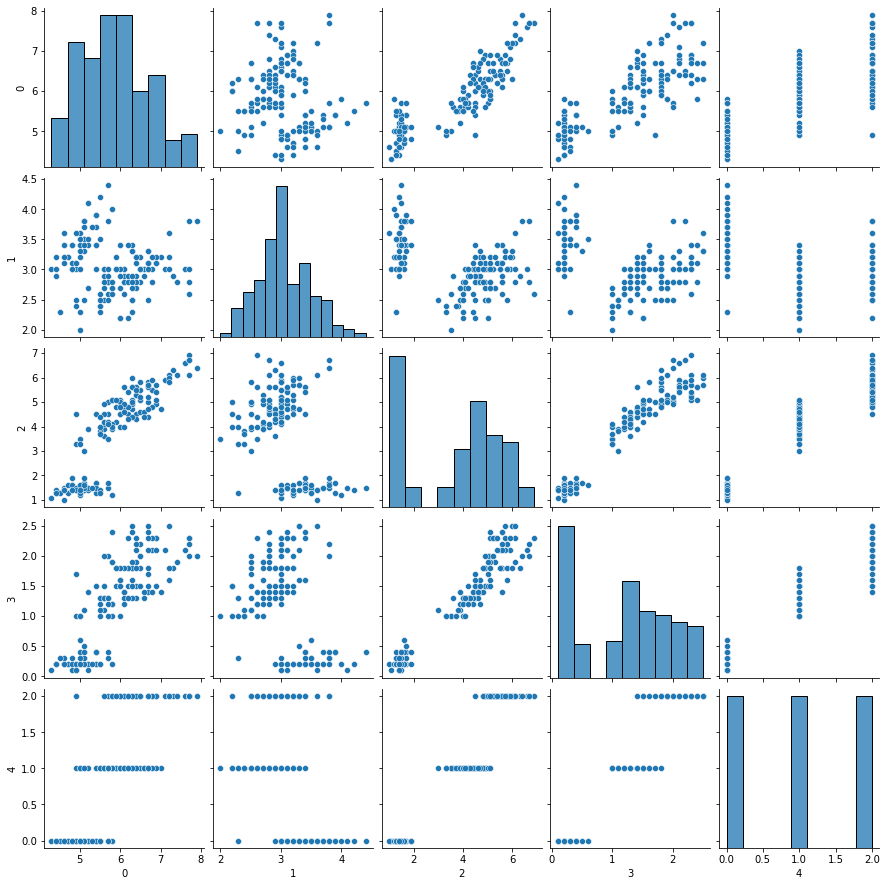

In [446]:
sns.pairplot(iris,palette='tab10')
plt.show()

In [447]:
# 学習、推定
# ロジスティック回帰
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log")

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [448]:
# 評価指標
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


In [449]:
# SVM
from sklearn.svm import SVC
clf = SVC(gamma='auto')

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [450]:
# 評価指標
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


In [451]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [452]:
# 評価指標
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.9
precision 0.8333333333333334
recall 1.0
f1 0.9090909090909091


In [453]:
# シンプルデータセット１で学習、推定
X = sample1_X
y = sample1_y

X_train, X_test, y_train, y_test = \
scratch_train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (400, 2)
y_train.shape: (400,)
X_test.shape: (100, 2)
y_test.shape: (100,)


In [454]:
# ロジスティック回帰
clf = SGDClassifier(loss="log")

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [455]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


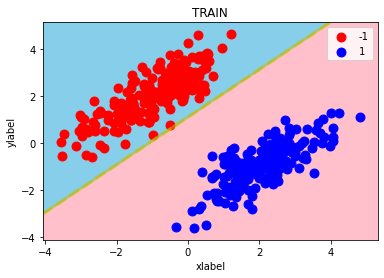

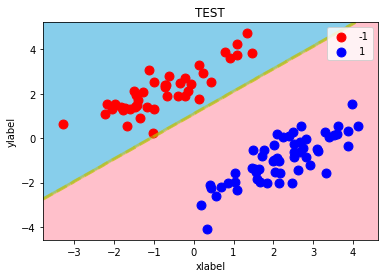

In [456]:
decision_region(X_train,y_train,clf,target_names=['-1', '1'],title='TRAIN')
decision_region(X_test,y_test,clf,target_names=['-1', '1'],title='TEST')

In [457]:
# SVM
clf = SVC(gamma='auto')

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [458]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


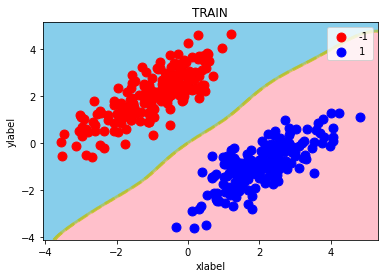

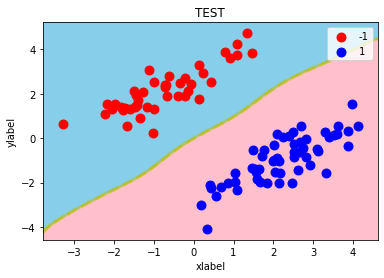

In [459]:
decision_region(X_train,y_train,clf,target_names=['-1', '1'],title='TRAIN')
decision_region(X_test,y_test,clf,target_names=['-1', '1'],title='TEST')

In [460]:
# 決定木
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [461]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


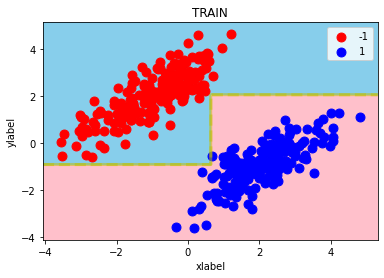

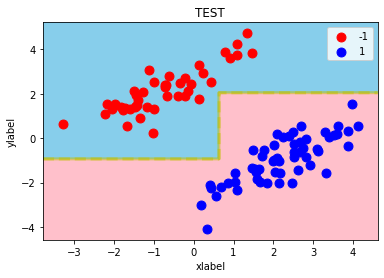

In [462]:
decision_region(X_train,y_train,clf,target_names=['-1', '1'],title='TRAIN')
decision_region(X_test,y_test,clf,target_names=['-1', '1'],title='TEST')

In [463]:
# シンプルデータセット２で学習、推定
X = sample2_X
y = sample2_y

X_train, X_test, y_train, y_test = \
scratch_train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (32, 2)
y_train.shape: (32,)
X_test.shape: (8, 2)
y_test.shape: (8,)


In [464]:
# ロジスティック回帰
clf = SGDClassifier(loss="log")

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [465]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.75
precision 0.6666666666666666
recall 0.6666666666666666
f1 0.6666666666666666


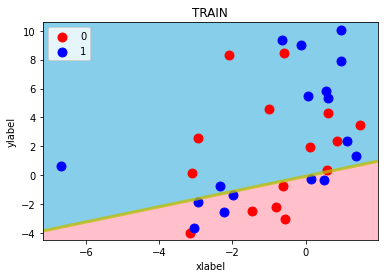

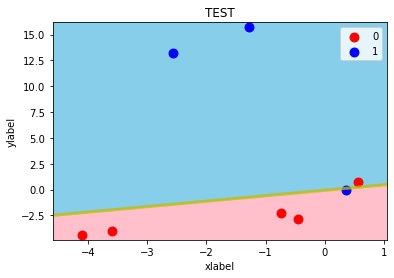

In [466]:
decision_region(X_train,y_train,clf,target_names=['0', '1'],title='TRAIN')
decision_region(X_test,y_test,clf,target_names=['0', '1'],title='TEST')

In [467]:
# SVM
clf = SVC(gamma='auto')

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [468]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.75
precision 0.6
recall 1.0
f1 0.7499999999999999


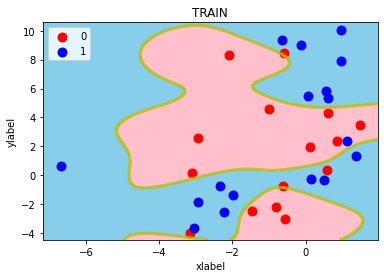

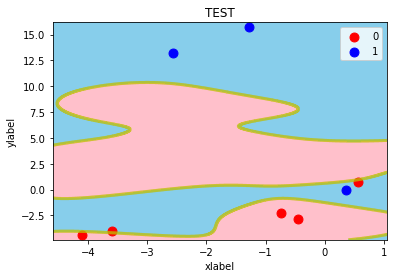

In [469]:
decision_region(X_train,y_train,clf,target_names=['0', '1'],title='TRAIN')
decision_region(X_test,y_test,clf,target_names=['0', '1'],title='TEST')

In [470]:
# 決定木
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [471]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


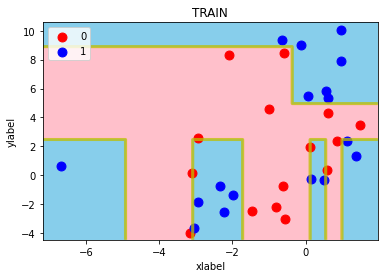

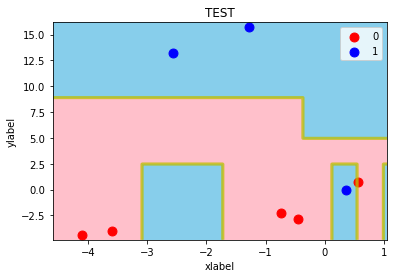

In [472]:
decision_region(X_train,y_train,clf,target_names=['0', '1'],title='TRAIN')
decision_region(X_test,y_test,clf,target_names=['0', '1'],title='TEST')

### 回帰問題
回帰は1種類をスクラッチします。

* 線形回帰

線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。  
  
sklearn.linear_model.SGDRegressor — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html  
  
データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。  
  
House Prices: Advanced Regression Techniques  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data  

train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

### 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [473]:
# House Pricesのtrainデータを読み込む
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
print('shape:',train.shape)
train.head()

shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [474]:
X = train[['GrLivArea','YearBuilt']].values
y = train[['SalePrice']].values
print('X.shape:',X.shape,'y.shape:',y.shape)

X.shape: (1460, 2) y.shape: (1460, 1)


In [475]:
# 訓練データ、検証データに分割
X_train, X_test, y_train, y_test = \
scratch_train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (1168, 2)
y_train.shape: (1168,)
X_test.shape: (292, 2)
y_test.shape: (292,)


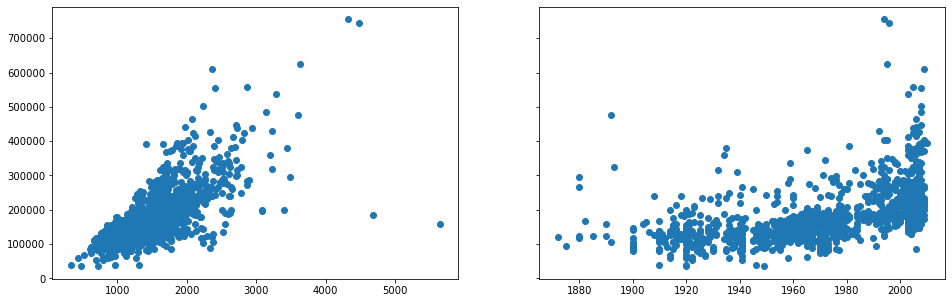

In [476]:
# データをプロットしてみる
fig,ax = plt.subplots(1,2,sharey=True,figsize=(16, 5))

ax[0].scatter(X_train[:,0],y_train)
ax[1].scatter(X_train[:,1],y_train);

In [477]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [478]:
# 線形回帰
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor()

reg.fit(X_train_std, y_train)

y_pred = reg.predict(X_test_std)

In [479]:
# 評価指標
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('MSE : {:.3f}'.format(mse))
print('RMSE : {:.3f}'.format(rmse))
print('R2 : {:.3f}'.format(r2))

MSE : 1724280326.017
RMSE : 41524.455
R2 : 0.650


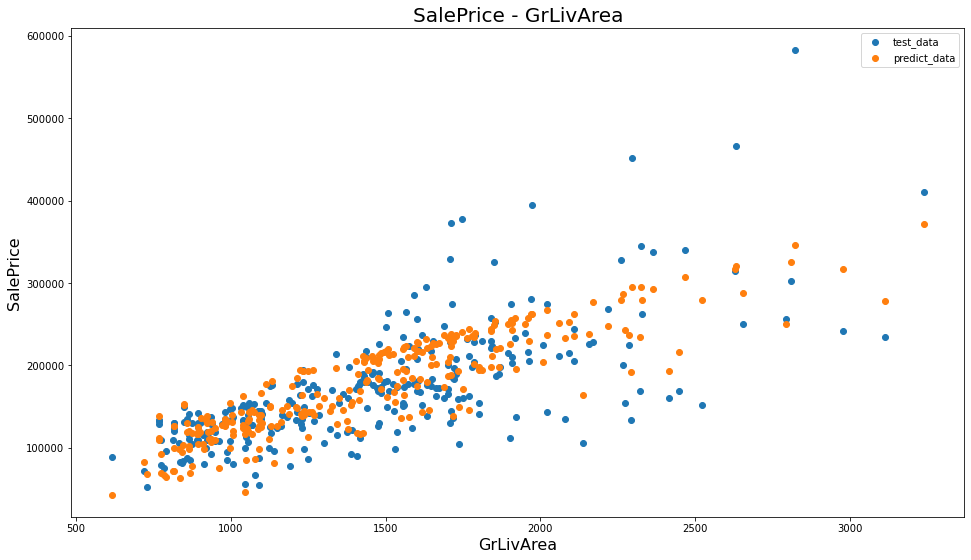

In [480]:
# 結果プロット
fig,ax = plt.subplots(figsize=(16, 9))

plt.scatter(X_test[:,0],y_test,label='test_data')
plt.scatter(X_test[:,0],y_pred,label='predict_data')

plt.title('SalePrice - GrLivArea',size=20)
plt.xlabel('GrLivArea',size=16)
plt.ylabel('SalePrice',size=16)
plt.legend();

### 【問題1】コード改良

In [6]:
s = 30
r = 3

train_size=0.8
random_state=0
X = np.arange(s*r).reshape(-1,r)
y = np.arange(s)
print('X:\n',X.shape)
print('y:\n',y.shape)

# トレインデータ、テストデータに分割
size = len(X)
pick = int(np.round(size*train_size))
train_pick = np.random.choice(np.arange(size),pick,replace=False)
test_pick = np.delete(np.arange(size),train_pick)
    
X_train = X[train_pick,:]
X_test = X[test_pick,:]
y_train = y[train_pick]
y_test = y[test_pick]

X:
 (30, 3)
y:
 (30,)


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

(24, 3)
(24,)
(6, 3)
(6,)
[[84 85 86]
 [ 9 10 11]
 [60 61 62]
 [15 16 17]
 [36 37 38]
 [30 31 32]
 [12 13 14]
 [57 58 59]
 [21 22 23]
 [27 28 29]
 [81 82 83]
 [24 25 26]
 [75 76 77]
 [ 0  1  2]
 [72 73 74]
 [45 46 47]
 [87 88 89]
 [63 64 65]
 [42 43 44]
 [51 52 53]
 [78 79 80]
 [18 19 20]
 [ 6  7  8]
 [48 49 50]]
[28  3 20  5 12 10  4 19  7  9 27  8 25  0 24 15 29 21 14 17 26  6  2 16]
[[ 3  4  5]
 [33 34 35]
 [39 40 41]
 [54 55 56]
 [66 67 68]
 [69 70 71]]
[ 1 11 13 18 22 23]
